### PyTroch Computer Vision


## 0.  Computer vision libaries in PyTorch

* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (image) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for pytorch
* `torch.utils.data.DataLoader` - Create a python iterable over a dataset


In [ ]:
# import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions

print(torch.__version__)
print(torchvision.__version__)



2.1.0+cu121
0.16.0+cu121


##1. Getting a datasets

The dataset we'll be using is  FashionMNIST from torchvision.dataset



In [ ]:
# Setup training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root= "data", #  where to download data to ?
    train = True, # do we want the training dataset ?
    download = True, # do ew want to download yes/no
    transform= torchvision.transforms.ToTensor(), # how do we want to transform the data ?
    target_transform=None # how do we want to transform the labels /targets?

)

test_data= datasets.FashionMNIST(
    root= "data",
    train= False,
    download =True,
    transform = ToTensor(),
    target_transform=None


)

100%|██████████| 26421880/26421880 [00:01<00:00, 15619143.08it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 345361.65it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5409266.77it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15259559.71it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# see the first training example
image, label = train_data[0]
image ,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx= train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

##1.1 Check input and output shapes of data

In [ ]:
# check the shape of our image
image.shape , label

print(f"Image shape :{image.shape} -> [color_channels, height, wwidth]")
print(f"Image label :{class_names[label]}")

Image shape :torch.Size([1, 28, 28]) -> [color_channels, height, wwidth]
Image label :Ankle boot


Image shape : torch.Size([1, 28, 28])


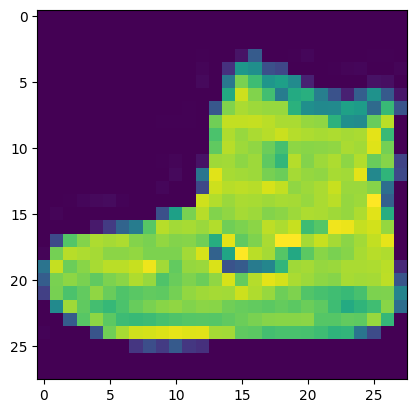

In [ ]:
## 1.2 Viisualizing our data
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

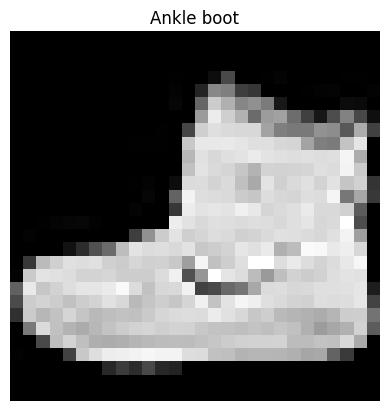

In [ ]:
plt.imshow(image.squeeze(),cmap= "gray")
plt.title(class_names[label])
plt.axis(False)

20775
24319
41910
35724
31297
20684
22010
11388
58936
30991
37201
44325
15892
39633
8043
21640


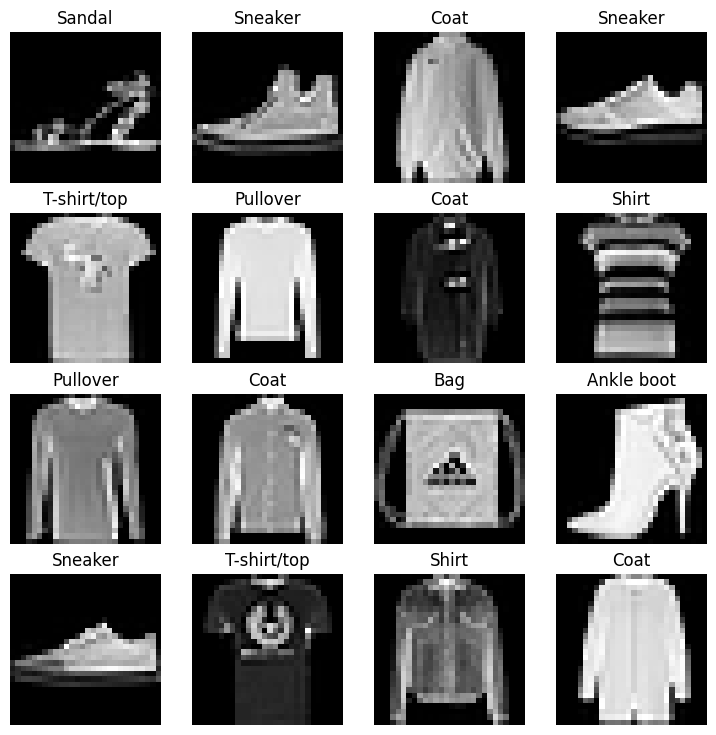

In [ ]:
 # plot more Images

 #torch.manual_seed(42)

 fig= plt.figure(figsize= (9,9))
 rows,cols= 4,4
 for i in range(1,rows*cols+1):
  random_idx= torch.randint(0,len(train_data),size = [1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)
  print(random_idx)


Do you think these items of clothing (images) could be modelled with pure linear lines ? you think we'll need non- linearities ?


##2. prepare Dataloader
Right now , our data is in the form of pytorch Datasets

DataLoader turns our dataset into a python iterable.

More specifically, we want to turn our data into batchs (or mini- batches).

Ehy would we do this

1. It is more computationally efficient, as in , your computing hardware may not be able to look (store in memory) at 60000 images in one hit . So we break it down to 32 images at a time (batchh size of 32)

2. It gives our neural network more chances to update its gradients per epoch



In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size= BATCH_SIZE,
                             shuffle= True)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cdcd51d4190>,
 <torch.utils.data.dataloader.DataLoader at 0x7cdcd5172920>)

In [ ]:
# Let's check out what we've created
print(f"DataLoader:{train_dataloader,test_dataloader}")

print(f"Length of train_dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}....")

DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x7cdcd51d4190>, <torch.utils.data.dataloader.DataLoader object at 0x7cdcd5172920>)
Length of train_dataloader:1875 batches of 32....
Length of test_dataloader: 313 batches of 32....


In [ ]:
# Check out what's inside the training dataloader

train_features_batch,train_labels_batch= next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 0 , label size : torch.Size([])


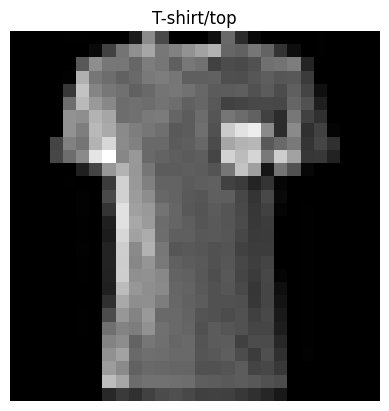

In [ ]:
# Show a sample

#torch.manual_seed(42)
random_idx= torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label} , label size : {label.shape}")

##3.  Model 0 : Build a baseline  model
When starting to build a series of machine learning modelling experiments, it,s best practice to start with a baseline model


A baseline model is a simple model you will try and improve upon with subsequent models /experiments

In other words: start simply and add complexity when necessary



In [ ]:
'''
a Flatten layer is often added after the convolutional and pooling layers
to transform the multidimensional output of these layers
into a one-dimensional vector
'''

# Create a flatten layer
flatten_model=nn.Flatten()

# Get a single sample
x=train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# print out What happened
print(f"Shape before flattening :{x.shape} -> [color_channels,height,width]")
print(f"Shape after flattening:{output.shape} ->[color_channels , height*weight]")


Shape before flattening :torch.Size([1, 28, 28]) -> [color_channels,height,width]
Shape after flattening:torch.Size([1, 784]) ->[color_channels , height*weight]


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
from torch import nn
class FashionMNISTmodelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features= hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTmodelV0(
    input_shape = 784,   # this is 28*28
    hidden_units=10 , # how many units in the hidden layer
    output_shape= len(class_names) # One for every class
).to("cpu")

model_0

FashionMNISTmodelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummay_x= torch.rand([1,1,28,28])
model_0(dummay_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#3.1. Setup loss and optimizer and evaluation metrics

* Loss function  - since we're working with multi -class data, our loss function will be
`nn.CrossEntropyLoss()`
* optimizer - our optimizer `torch.optim.SGD()` (Stochastic gradient descent)
* Evaluation metric - since we're working on a classificationi problem let's use accuracy as our evalution metric


In [ ]:
import requests
from pathlib import Path

# Download helper functions from learn PyTorch repo

if Path("helper_fuunctions.py").is_file():
  print("help_functions.py already exists ,skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr= 0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc )
2. How fast it runs



In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device= None):
  """ prints difference between start and end time."""
  total_time= end- start
  print(f"Train time on{device}:{total_time:.3f} seconds ")
  return total_time



In [ ]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start= start_time,end= end_time,device= "cpu")


Train time oncpu:0.000 seconds 


0.00028393099998424987

###3.3 Creating a Training loop and training a model on batches of data


1.  Loop through epochs
2.  Loop through training batches , perform trainiing steps , calculate the train  loss *per batch *
3.  Loop through testing batches .perform testing steps, calculate the test loss *per batch*
4.  Print out what's happening .
5.  Time it all(for fun)


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    #1. Forward pass
    y_pred= model_0(X)

    # 2. Calculate Loss (per batch)
    loss = loss_fn(y_pred, y)

    train_loss+= loss # accumulate train loss

    # 3 optimizer zero grad
    optimizer.zero_grad()

    #4.  Forwad backward propagation / Backpropagation
    loss.backward()

    #5  optimizer steps
    optimizer.step()


    # print out what's happening

    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples.")


    # Divide total train loss by lenght of train dataloader
  train_loss/= len(train_dataloader)

  ### Testiing
  test_loss, test_acc = 0,0
  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. Forwaard Pass
      test_pred = model_0(X_test)

      #2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      #3.Calculate accuracy
      test_acc += accuracy_fn(y_true = y_test,
                              y_pred = test_pred.argmax(dim=1))

     # Calculate the test loss average per batch
      test_loss /= len(test_dataloader)

     # Calculate the test Acc average per batch
      test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\n train loss: {train_loss:.4f} | Test loss:{test_loss:.4f}, test acc: {test_acc:.4f}")

# calculate trainning time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 train loss: 0.5904 | Test loss:0.0022, test acc: 0.2805
Epoch: 1
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 train loss: 0.4743 | Test loss:0.0022, test acc: 0.2404
Epoch: 2
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

 train loss: 0.4537 | Test loss:0.0021, test acc: 0.2405
Train time oncpu:40.063 seconds 


## 4. Make predictions and get Model_0 result

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn
               ):

  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss,acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred , y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}

# Calculate model_0 result on test dataset
model_0_results= eval_model(model= model_0,
                            data_loader=test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn= accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## 5. Setup device agnostic-code (for using a GPU if there is one )

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Setup device- agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non- linearity in notebook 02 - https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU


In [ ]:
# create a model with non- linear and linear layers
class FashionMNISTmodelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):

    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)



In [ ]:
# Create an instance of model_1
model_1= FashionMNISTmodelV1(input_shape=28*28 , # This is the output of the flatten after oor 28*28 image goes in
                             hidden_units=10,
                             output_shape=len(class_names)).to(device) # send to the GPU if it's available
model_1

FashionMNISTmodelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 6.1 Setup loss Optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(),  # tries to update our model's parameters to reduce the loss
                            lr= 0.1)

### 6.2 Functionizing training and evaluating / testiing loops

let's create a function for:
*  training loop - train_step()
*  testing loop - test_step()


In [ ]:

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device= device):
  """ Performs a training with model trying to learn on data_loader."""
  train_loss,train_acc= 0,0

  # put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    X,y  = X.to(device), y.to(device)

    #1. Forward pass (outputs the raw logits from the model)
    y_pred= model(X)

    # 2. Calculate Loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss+= loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred= y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3 optimizer zero grad
    optimizer.zero_grad()

    #4.  Forwad backward propagation / Backpropagation
    loss.backward()

    #5  optimizer steps
    optimizer.step()


    # print out what's happening

    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples.")


    # Divide total train loss and acc  by lenght of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc : {train_acc:.2f}% ")







In [ ]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device= device
              ):
  """performs a testing loop step on model going over data_loader."""
  test_loss,test_acc = 0,0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager

  with torch.inference_mode():
    for X,y in data_loader:
      # Send the daat to the target device
      X,y = X.to(device), y.to(device)

      # 1.  Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/Acc
      test_loss +=loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true =y,
                              y_pred= test_pred.argmax(dim= 1))  # go from logits -< prediction label
      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
    print(f"Test Loss {test_loss:.5f} |Test acc: {test_acc:.2f}% \n")



In [ ]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu= timer()

# Set Epochs
epochs = 3

# Create a optimiztion and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch} \n...........")
  train_step(model= model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device= device)

  test_step(model= model_1,
            data_loader=test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)

train_time_end_on_gpu= timer()

total_train_time_model_1= print_train_time(start = train_time_start_on_cpu,
                                           end= train_time_end_on_gpu,
                                           device= device)





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0 
...........
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.69330 | Train acc : 75.74% 
Test Loss 0.00251 |Test acc: 0.26% 

Epoch :1 
...........
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.49588 | Train acc : 82.30% 
Test Loss 0.00269 |Test acc: 0.22% 

Epoch :2 
...........
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.46783 | Train acc : 83.29% 
Test Loss 0.00218 |Test acc: 0.24% 

Train time oncpu:77.913 seconds 


**Note:** Sometime ,depending on your data/hardware you might find that your model trains faster on CPU than GPU


Why is this ?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU

2. The hardware you are using has a better CPU in terms compute capability than the GPU

In [ ]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device= device
               ):

  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss,acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our data device agnostic
      X,y = X.to(device),y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred , y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}


In [ ]:
# Get model_1 results dictionary
model_1_results= eval_model(model=model_1,
                            data_loader= test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn=accuracy_fn,
                            )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV1',
 'model_loss': 0.539148211479187,
 'model_acc': 81.65934504792332}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## Model 2: Building a convolutional Neural NEtwork (CNN)

CNN's are also known ConvNets

CNN's are Known for their capabilities to find patterns in visual data


https://poloclub.github.io/cnn-explainer/

In [ ]:
 # Create a convolutional neural network
 class FashionMNISTmodelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model form CNN explainer Website.
  """

  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride= 1,
                  padding= 1),  # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride= 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2,stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)

    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,   # There's a trick to calculating this....
                  out_features = output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1:{x.shape}")
    x= self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x= self.classifier(x)
    #print(f"Output shape of classifier: {x.shape} ")
    return x




In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTmodelV2(input_shape = 1,
                              hidden_units= 10,
                              output_shape= len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(size= (1,28,28)) # THIS CODE IS USEFUL FOR CALCULATING THE IN_FEATURES IN MODEL
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## 7.1 Stepping through `nn.conv2d()`

see the documentation for nn.Conv2d() here : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(42)

# Create a batch of Image

images = torch.randn(size= (32,3,64,64))
test_image = images[0]

print(f"Image batch shape :{image.shape}")
print(f"Single Image shape: {test_image.shape}")
print(f"Test Image:\n{test_image}")


Image batch shape :torch.Size([1, 28, 28])
Single Image shape: torch.Size([3, 64, 64])
Test Image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
#Create a single conv2d layer
conv_layer= nn.Conv2d(in_channels = 3,
                      out_channels= 10,
                      kernel_size= (3,3),
                      stride = 1,
                      padding = 0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output


tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

### 7.2 Stepping through nn.MaxPool2d()

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [ ]:
# Print out original image shape
print(f"Test image original shape : {test_image.shape}")
print(f"Test Image with unsqueezed dimension : {test_image.unsqueeze(0).shape}")

#Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim =0))
print(f"Shape after going through conv_layer():{test_image_through_conv.shape}")

#Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer:{test_image_through_conv_and_max_pool.shape}")


Test image original shape : torch.Size([3, 64, 64])
Test Image with unsqueezed dimension : torch.Size([1, 3, 64, 64])
Shape after going through conv_layer():torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer:torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimension
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\n Random tensor :\n{random_tensor}")
print(f"\n Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer= nn.MaxPool2d(kernel_size= 2)

# Pass the random tensor through the max pool layer
max_pool_tensor= max_pool_layer(random_tensor)
print(f"\n Max pool tensor:\n{max_pool_tensor}")
print(f"Max pool tensor shape :{max_pool_tensor.shape}")



 Random tensor :
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 Random tensor shape: torch.Size([1, 1, 2, 2])

 Max pool tensor:
tensor([[[[0.3367]]]])
Max pool tensor shape :torch.Size([1, 1, 1, 1])


 ### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function /eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


### 7.4 training and testing `model_2 using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time

from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n_________")
  train_step(model= model_2,
             data_loader = train_dataloader,
             loss_fn= loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device= device
             )
  test_step(model= model_2,
            data_loader= test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn,
            device= device)

train_time_end_model_2= timer()
total_train_time_model_2 = print_train_time(start= train_time_start_model_2,
                                            end= train_time_end_model_2,
                                            device= device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
_________
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.59518 | Train acc : 78.38% 
Test Loss 0.00169 |Test acc: 0.28% 

Epoch: 1 
_________
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.36421 | Train acc : 86.86% 
Test Loss 0.00123 |Test acc: 0.28% 

Epoch: 2 
_________
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train loss: 0.32472 | Train acc : 88.31% 
Test Loss 0.00203 |Test acc: 0.26% 

Train time oncpu:176.688 seconds 


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model= model_2,
    data_loader= test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.3493732511997223,
 'model_acc': 87.47004792332268}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTmodelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

### 8. Compare model results and training time


In [ ]:
import pandas as pd
compare_results= pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTmodelV0,0.512530,83.007188
1,FashionMNISTmodelV1,0.539148,81.659345
2,FashionMNISTmodelV2,0.349373,87.470048


In [ ]:
# Add training time to results comparsion
compare_results["training_time"]= [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTmodelV0,0.512530,83.007188,40.063377
1,FashionMNISTmodelV1,0.539148,81.659345,77.913273
2,FashionMNISTmodelV2,0.349373,87.470048,176.688001


Text(0, 0.5, 'model')

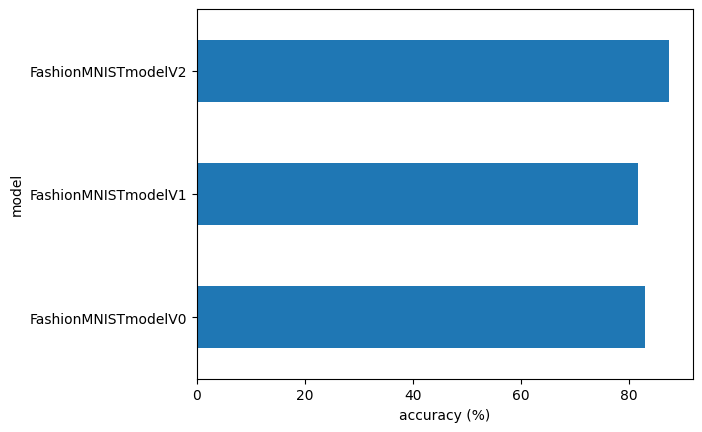

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

9.Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device= device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

     # Forward pass(model output raw logits )
      pred_logit = model(sample)

     # Get prediction probability (logit -> prediction probability )
      pred_prob = torch.softmax(pred_logit.squeeze(),dim= 0)

     # Get pred_prob off the GPU for furture calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k= 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

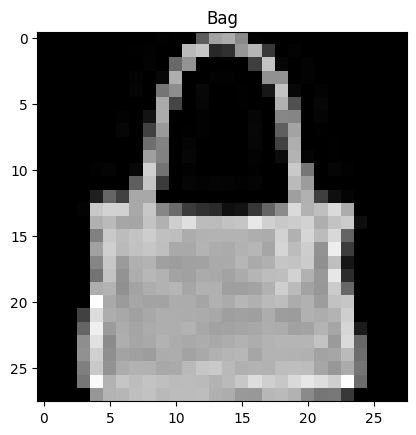

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap= "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make Predictions
Pred_probs= make_predictions(model= model_2,
                             data= test_samples,
                             )
# View first two predictions probabilities

Pred_probs[:2]


tensor([[2.2127e-05, 4.8875e-07, 4.0486e-04, 9.2615e-05, 1.3795e-04, 1.5838e-04,
         2.2989e-06, 2.3016e-05, 9.9916e-01, 1.4356e-07],
        [4.4008e-05, 9.9715e-01, 5.1230e-07, 2.7746e-03, 4.3373e-06, 9.1660e-07,
         1.4357e-05, 4.2649e-06, 5.8931e-06, 3.4361e-06]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = Pred_probs.argmax(dim= 1)
pred_classes

tensor([8, 1, 3, 7, 0, 8, 0, 9, 1])

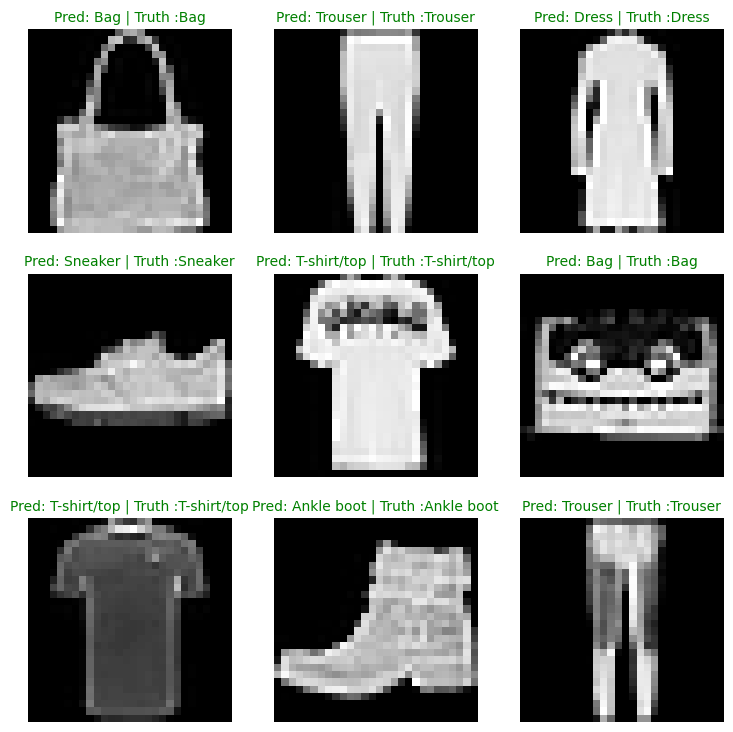

In [ ]:
# Plot prediction
plt.figure(figsize= (9,9))
nrows = 3
ncols= 3
for i,sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols,i+1)

  # plot the target image
  plt.imshow(sample.squeeze(),cmap= "gray")

  # find the prediction (in test form e.g. "Sandal")
  pred_label= class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label= class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth :{truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize = 10, c= "g")
  else:
    plt.title(title_text,fontsize = 10,c= "r")
  plt.axis(False)





## 10 Making a confusion matrix for furture prediction evalution

1.  Make predictions with our trained model on the dataset

2. make a confusion matrix `torchmetrics.ConfusionMatrix`-https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html

3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`- https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/


In [ ]:
import mlxtend
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds= []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc= "Making predictions...."):
    # Send the data and targets to target device
    X,y = X.to(device),y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim= 0).argmax(dim= 1)
    #put prediction on cpu for evalution
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([8, 2, 6, 6, 3, 8, 2, 7, 5, 5])

In [ ]:
!pip install torchmetrics

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.22.0


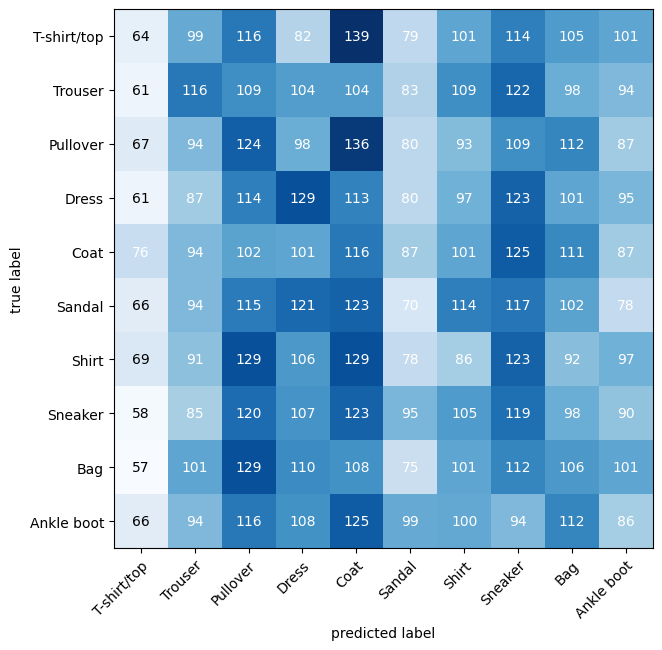

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting  import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
task = 'multiclass'  # Specify the task type ('binary' or 'multiclass')

confmat = ConfusionMatrix(task=task,num_classes= len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                          target = test_data.targets)


# 3 . plt the confusion matrix
fig.ax= plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplot likes working with numpy
    class_names= class_names,
    figsize= (10,7)
)

## 11 Save and load model


In [ ]:
from pathlib import Path

# Create model dictory  path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok=True)
# create model save

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

# save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f= MODEL_SAVE_PATH
           )



Saving model to : models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTmodelV2(input_shape= 1,
                                     hidden_units=10,
                                     output_shape= len(class_names))
# load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)


FashionMNISTmodelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results= eval_model(
    model= loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn= accuracy_fn

)
loaded_model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.349838525056839,
 'model_acc': 87.44009584664536}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTmodelV2',
 'model_loss': 0.3493732511997223,
 'model_acc': 87.47004792332268}

In [ ]:
# check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              )


tensor(False)

### Exercise

In [ ]:
import torchvision
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms


In [ ]:
train_data = datasets.FashionMNIST(
    root= "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform=None)

# Setup testing data

test_data = datasets.FashionMNIST(
    root= "data",
    download= True,
    train= False ,
    target_transform = ToTensor()
)


In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_ind = train_data.class_to_idx
class_to_ind

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

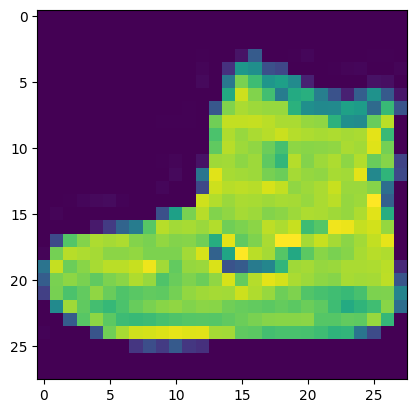

In [ ]:
image,label= train_data[0]
plt.imshow(image.squeeze())

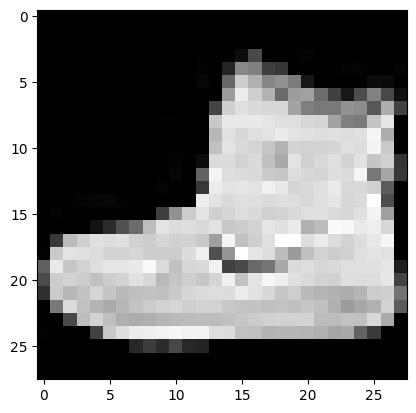

In [ ]:
plt.imshow(image.squeeze(),cmap= "gray")

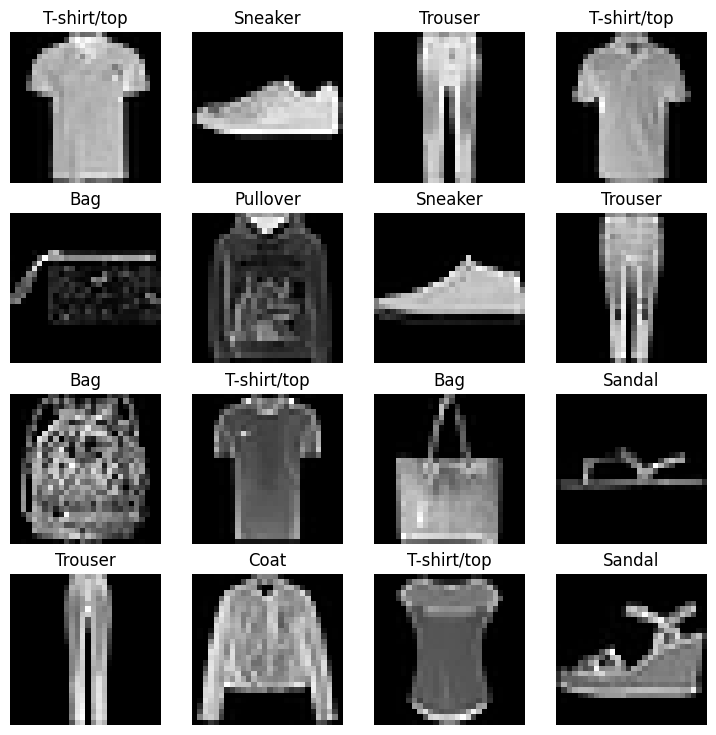

In [ ]:
fig= plt.figure(figsize= (9,9))
nrows= 4
ncols= 4
for i in range(1,nrows*ncols+1):
  random_idx= torch.randint(0,len(train_data),size=[1]).item()
  img,label =train_data[random_idx]
  fig.add_subplot(nrows,ncols,i)
  plt.imshow(img.squeeze(),cmap= "gray")
  plt.title(class_names[label])
  plt.axis(False)



In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle= True)

test_dataloader= DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78c68ba55b40>, <torch.utils.data.dataloader.DataLoader object at 0x78c68ba54f10>)
Length of train dataloader 1875 batches of 32
Length of test dataloader 313 batches of 32
